# Preparação dos dados

#### 1 - Carga dos dados no dataframe

In [15]:
import pandas as pd
import numpy as np
from bleach.sanitizer import Cleaner
import regex as re
import html
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Realizando parse de data em coluna única no momento da carga dos dados no dataframe
df = pd.read_excel("../../Data/Raw/informacao.xlsx", usecols =['Titulo','Texto','Topico'],dtype={'titulo':str, 'texto':str, 'topico':str}) 

df.head()

,Titulo,Texto,Topico
0,Despachos SCG/ANEEL nº 1500 1.501 1.503 1.5...,Levamos ao conhecimento os Despachos SCG/ANEEL...,Alteração das características técnicas
1,Resoluções Autorizativas ANEEL nº 6.375 nº 6....,Levamos ao conhecimento as Resoluções Autoriza...,Outorga
2,Resoluções Autorizativas ANEEL nº 6.375 nº 6....,Levamos ao conhecimento as Resoluções Autoriza...,Autorização e concessões de equipamentos
3,Resolução Autorizativa ANEEL nº 6.401,Levamos ao conhecimento a Resolução Autorizati...,Acesso
4,Resolução Autorizativa ANEEL nº 6.402,Levamos ao conhecimento a Resolução Autorizati...,Receita Anual Permitida - RAP


In [3]:
df.tail()

,Titulo,Texto,Topico
27552,AVISO 2° FASE DA CONSULTA PÚBLICA Nº 39/2021,<p>Processos: 48500.003882/2011-11 48500.0015...,Audiência e Consulta Pública
27553,AVISO 2° FASE DA CONSULTA PÚBLICA Nº 39/2021,<p>Processos: 48500.003882/2011-11 48500.0015...,Tarifas
27554,RESOLUÇÃO NORMATIVA ANEEL Nº 1.009 DE 22 DE M...,"<p style=""text-align:justify"">Estabelece as re...",Sem Topico
27555,RESOLUÇÃO NORMATIVA ANEEL Nº 1.009 DE 22 DE M...,"<p style=""text-align:justify"">Estabelece as re...",Sem Topico
27556,ATA DA 10ª REUNIÃO PÚBLICA ORDINÁRIA DA DIRETO...,"<p style=""text-align:justify""><span style=""col...",Reunião Pública da Diretoria da ANEEL


#### 2 - Verificações

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27557 entries, 0 to 27556
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titulo  27557 non-null  object
 1   Texto   27557 non-null  object
 2   Topico  27557 non-null  object
dtypes: object(3)
memory usage: 646.0+ KB


In [6]:
# Verificação de tópicos
df_topico_count = df.groupby('Topico')['Topico'].count().sort_values(ascending=False).to_frame()

In [7]:
df_topico_count.index.name = 'Indice'
df_topico_count.reset_index(inplace=True)
df_topico_count.rename(columns={'Topico':'quantidade'}, inplace=True)
df_topico_count.rename(columns={'Indice':'topico'}, inplace=True)


In [8]:
df_topico_count['qtd_acc'] = df_topico_count['quantidade'].cumsum()

In [9]:
df_topico_count['perc'] = (df_topico_count['qtd_acc'] / (df_topico_count['quantidade'].sum()) * 100).round(2)

In [10]:
df_topico_count.head(40)

,topico,quantidade,qtd_acc,perc
0,Entrada em operação,2511,2511,9.11
1,Outorga,1537,4048,14.69
2,Instalação de interesse restrito,1480,5528,20.06
3,REIDI - Regime Especial de Incentivos para Des...,1460,6988,25.36
4,Produção Independente e Autoprodutor,1296,8284,30.06
5,Alteração das características técnicas,1249,9533,34.59
6,Exploração de empreendimento,1065,10598,38.46
7,Procedimentos e diretrizes do Setor Elétrico,1024,11622,42.17
8,Entrada em Operação Comercial,991,12613,45.77
9,Cronograma de implantação,982,13595,49.33


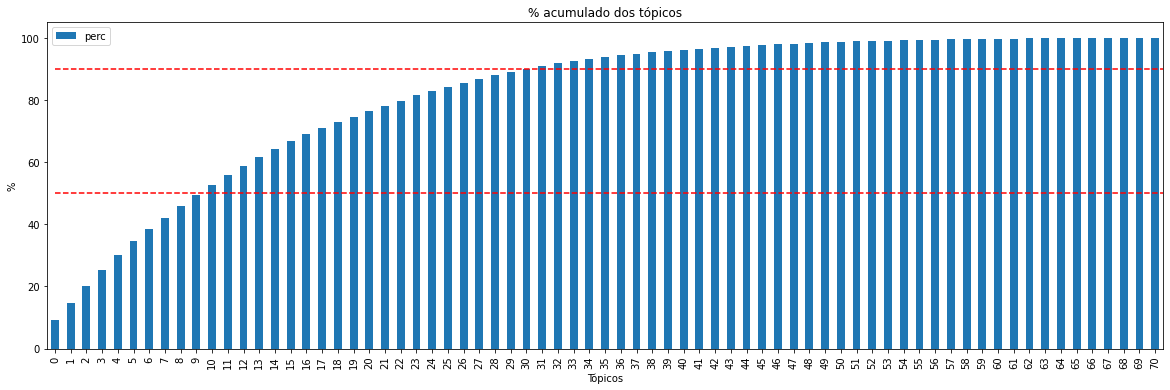

In [333]:
# Gráfico de barras
plt.rcParams["figure.figsize"] = [20, 6]
ax = df_topico_count.plot.bar(x='topico',y='perc')
ax.set_xticklabels(df_topico_count.index)
plt.title('% acumulado dos tópicos')
plt.xlabel('Tópicos')
plt.ylabel('%')
plt.hlines(y=50, xmin=0, xmax=100, color='red', linestyles='dashed', label='50%')
plt.hlines(y=90, xmin=0, xmax=100, color='red', linestyles='dashed', label='90%')

### Pelo gráfico podemos ver que 10 tópicos representam aproximadamente 50% do total e 30 tópicos representam 90% to total. Num total de 71 tópicos.

In [334]:
# Vamos trabalhar com os 10 tópicos principais que representam 50% dos dados.

s_top_10_topicos = df_topico_count.iloc[0:11,:]['topico']

In [335]:
df['Topico'] = df['Topico'].apply(lambda x: x if x in s_top_10_topicos.values else 'Outros')

In [337]:
df.head()

,Titulo,Texto,Topico
0,Despachos SCG/ANEEL nº 1500 1.501 1.503 1.5...,Levamos ao conhecimento os Despachos SCG/ANEEL...,Alteração das características técnicas
1,Resoluções Autorizativas ANEEL nº 6.375 nº 6....,Levamos ao conhecimento as Resoluções Autoriza...,Outorga
2,Resoluções Autorizativas ANEEL nº 6.375 nº 6....,Levamos ao conhecimento as Resoluções Autoriza...,Outros
3,Resolução Autorizativa ANEEL nº 6.401,Levamos ao conhecimento a Resolução Autorizati...,Outros
4,Resolução Autorizativa ANEEL nº 6.402,Levamos ao conhecimento a Resolução Autorizati...,Outros


#### 2 - Limpeza

Verificadas tags html e codificação de url nos textos. Provavelemente em algum momento a aplicação passou a fornecer a funcionalidade de texto rico para a edição de textos.

In [339]:
# Exemplo
df.iloc[25000]['Texto']

'<p style="text-align:justify">O DIRETOR-GERAL DA AG&Ecirc;NCIA NACIONAL DE ENERGIA EL&Eacute;TRICA &ndash; ANEEL  no uso de suas atribui&ccedil;&otilde;es regimentais  de acordo com a delibera&ccedil;&atilde;o da Diretoria  tendo em vista o disposto no art. 17 da Lei n&ordm; 9.074  de 7 de julho de 1995  no art. 8&ordm; da Lei n&ordm; 9.648  de 27 de maio de 1998  no art. 12 do Decreto n&ordm; 1.717  de 24 de novembro de 1995  nos art. 6&ordm;  &sect; 1&ordm;  e 7&ordm;  inciso II  do Decreto n&ordm; 2.655  de 2 de julho de 1998  nas Resolu&ccedil;&otilde;es Normativas n&ordm; 67 e 68  ambas de 8 de junho de 2004  no art. 4&ordm;  inciso IV  Anexo I  do Decreto n&ordm; 2.335  de 6 de outubro de 1997  na Resolu&ccedil;&atilde;o Normativa n&ordm; 905  de 8 de dezembro de 2020  bem como o que consta do Processo n&ordm; 48500.001249/2019-46  resolve:</p>  <p style="text-align:justify">Art. 1&ordm; Autorizar Copel Gera&ccedil;&atilde;o e Transmiss&atilde;o S/A  Contrato de Concess&atilde;o

In [340]:
# Força conversão de coluna de texto para string evitando erros de conversão posteriores
df['Texto'] = df['Texto'].astype('str') 

In [341]:
# Codifica textos. Ex: Transforma AG&Ecirc;NCIA em AGÊNCIA
df['Texto'] = df['Texto'].apply(lambda x: html.unescape(x))

In [343]:
cleaner = Cleaner(tags=[], attributes=[], styles=[], protocols=[], strip=True, strip_comments=True, filters=None)

# Retira todas as tags html dos textos
df['Texto'] = df['Texto'].apply(lambda x: cleaner.clean(x))

In [345]:
# Transformar todo o texto em minúsculo
df['Texto'] = df['Texto'].apply(lambda x: x.lower())

In [346]:
# Resultado final, texto tratado

df.iloc[25000]['Texto']

'o diretor-geral da agência nacional de energia elétrica – aneel  no uso de suas atribuições regimentais  de acordo com a deliberação da diretoria  tendo em vista o disposto no art. 17 da lei nº 9.074  de 7 de julho de 1995  no art. 8º da lei nº 9.648  de 27 de maio de 1998  no art. 12 do decreto nº 1.717  de 24 de novembro de 1995  nos art. 6º  § 1º  e 7º  inciso ii  do decreto nº 2.655  de 2 de julho de 1998  nas resoluções normativas nº 67 e 68  ambas de 8 de junho de 2004  no art. 4º  inciso iv  anexo i  do decreto nº 2.335  de 6 de outubro de 1997  na resolução normativa nº 905  de 8 de dezembro de 2020  bem como o que consta do processo nº 48500.001249/2019-46  resolve:  art. 1º autorizar copel geração e transmissão s/a  contrato de concessão n° 060/2001  a implantar osreforços em instalação de transmissão de energia elétrica sob sua responsabilidade descritos no anexo i.  art. 2º estabelecer  no anexo i  os valores das parcelas de receita anual permitida – rap e  no anexo ii  o 

### 3 - Gravação do dataset preparado para a análise e modelagem

In [348]:
PARQUET_TEXTO_PREPARADO = '../../Data/Processed/informacoes_preparadas.parquet'

df.to_parquet(PARQUET_TEXTO_PREPARADO)